# Когнитивные технологии

*Алла Тамбовцева*

## Примеры дискретных распределений: практикум в Python

### Бинарное распределение

**Испытание Бернулли** – случайный эксперимент, у которого два исхода: «успех» (иногда кодируется единицей) и «неудача» (иногда кодируется единицей). Вероятность успеха обозначается $p$, а вероятность неудачи $q = 1-p$.  

*Пример.* Один бросок правильной монетки – испытание Бернулли с вероятностями $p=q=0.5$.

Одно испытание Бернулли можно описать **бинарной** случайной величиной со следующим рядом распределения:

<table>
<tr>
<td>$X$</td><td>$0$</td><td>$1$</td>
</tr>
<tr>
<td>$P$</td><td>$q$</td><td>$p$</td>
</tr>
</table>

Бинарное распределение (оно же распределение Бернулли) задаётся единственным параметром $p$. Зная $p$, мы легко посчитаем $q$, а также определим характеристики случайной величины: математическое ожидание, дисперсию, стандартное отклонение. Несложно показать, что $E(X) = p$, $D(X) = pq$ и $sd(X)=\sqrt{pq}$.

Перейдем к практике. Импортируем модуль `stats` из библиотеки `scipy`:

In [1]:
import scipy.stats as st

Создадим бинарную случайную величину с параметром $p=0.6$ (вероятность успеха равна $0.6$):

In [2]:
binary = st.bernoulli(p=0.6)

Если мы посмотрим на саму переменную `binary`, ничего интересного мы не увидим. Но зато к объекту `binary` можно применять разные методы. Например, мы можем запросить математическое ожидание:

In [3]:
binary.expect()  # совпадает с p

0.6

И дисперсию:

In [4]:
binary.var() # действительно p(1-p)

0.24

А также стандартное отклонение:

In [5]:
binary.std()

0.4898979485566356

Кроме того, можно запросить все моменты распределения сразу: математическое ожидание (*mean* или *expected value*), дисперсию (*variance*), асимметрию (*skewness*) и эксцесс (*kurtosis*).

In [6]:
binary.stats('mvsk')  # mean, variance, skewness, kurtosis

(array(0.6), array(0.24), array(-0.40824829), array(-1.83333333))

### Теоретическое отступление: моменты случайной величины

**Момент случайной величины** – неслучайная величина, которая, в свою очередь, является числовой характеристикой случайной величины. По определению момент порядка $k$ (или $k$-ый момент) случайной величины $X$: 

$$
m_k = E(X^k).
$$

Несложно заметить, что математическое ожидание случайной величины является её первым моментом: $m_1 = E(X)$. Дисперсия случайной величины является вторым моментом, причём не простым, а центральным: $m_2 = E(X-E(X))^2$.  

Третий центральный момент определяется так: $m_3 = E(X-E(X))^3$. Если этот момент нормировать, поделив на стандартное отклонение случайной величины в степени $3$, мы получим коэффициент асимметрии распределения (*skewness*):

$$
skewness = \frac{m_3}{sd(X)^3}.
$$

Значения коэффициента могут быть как положительными, так и отрицательными. Коэффициент асимметрии равный $0$ соответствует распределению, симметричному относительно математического ожидания, положительные значения означают скошенность распределения вправо (распределение имеет длинный «хвост» справа, то есть значения больше математического ожидания встречаются значительно реже, чем значения меньше ожидаемого среднего), отрицательные  – скошенность влево (распределение имеет длинный «хвост» слева, то есть значения меньше математического ожидания встречаются значительно реже, чем значения больше ожидаемого среднего).

Четвёртый центральный момент определяется так: $m_4 = E(X-E(X))^4$. Если этот момент нормировать, поделив на стандартное отклонение случайной величины в степени $4$, и сдвинуть его на 3 единицы, мы получим коэффициент эксцесса (*kurtosis*):

$$
kurtosis = \frac{m_4}{sd(X)^4} - 3.
$$

Значения коэффициента эксцесса также могут быть как отрицательными (но не меньше $-2$), так и положительными. Коэффициент эксцесса показывает, насколько выражен пик распределения: если значение положительно и достаточно большое, больше $3$, то пик выражен сильно (более острый), если значение отрицательно, то пик выражен слабо (более гладкий).

Также момент порядка $k$ можно определить через значение $k$-той производной характеристической функции случайной величины в нуле. Характеристическая функция распределения задаётся следующей формулой:

$$
\phi_X(t) = E(e^{itX}).
$$

Тогда $k$-тый момент (естественно, если он существует) выражается так:

$$
m_k = i^{-k} \cdot \frac{\partial^k \phi_X(t)}{\partial t^k}\biggr\rvert_{t=0}.
$$

В этом ноутбуке мы не будем специально останавливаться на характеристических функциях, в качестве дополнительного домашнего задания будет предложено вывести значения моментов некоторых распределений методом дифференцирования характеристических функций (чтобы не было скучно и банально, это будет предложено сделать с помощью библиотеки `sympy` для символьных вычислений в Python).

Интерпретировать моменты бинарной случайной величины не так интересно, учитывая, что у неё всего два значения, вернёмся к ним чуть позже.

### Биномиальное распределение

**Серия из $n$ испытаний Бернулли** – случайный эксперимент, в котором испытание Бернулли повторяют независимо $n$ раз.

*Пример.* $10$ бросков правильной монеты является серией испытаний Бернулли (независимость здесь проявляется в том, что мы в любом случае бросаем монету ещё раз, пока не бросим её $10$ раз, независимо от того, что выпало, орёл или решка). 

Число успехов в серии испытаний Бернулли можно описать **биномиальной** случайной величиной. Биномиальную случайную величину можно рассматривать как сумму независимых одинаково распределённых (с одинаковыми параметрами $p$) бинарных случайных величин. Биномиальное распределение задаётся двумя параметрами: $n$ (число испытаний Бернулли в серии) и $p$ (вероятность успеха в одном испытании Бернулли). Описать распределение дискретной случайной величины – соотнести её значения и вероятности. Очевидно, что если биномиальная величина описывает число успехов в серии из $n$ испытаний Бернулли, то она может принимать только целые значения от $0$ до $n$. Вероятности каждого значения $k$ биномиальной случайной величины с параметрами $n$ и $p$ вычисляются так:

$$
P(X=k) = C_n^k \cdot p^k \cdot (1-p)^{n-k} = \frac{n!}{k!(n-k)!} \cdot p^k \cdot (1-p)^{n-k}.
$$

Конечно, нет необходимости писать свою функцию в Python, чтобы считать такие вероятности. Однако на всякий случай вспомним, как в Python можно посчитать факториалы и биномиальные коэффициенты.

In [7]:
# факториалы
from math import factorial
factorial(6)  # 6!

720

In [8]:
# биномиальные коэффициенты
import scipy.special as sp
sp.binom(4, 2) # сначала указывается n, потом k

6.0

Теперь перейдём непосредственно к биномиальным величинам и биномиальным вероятностям. Для создания биномиальной случайной величины и вычисления вероятностей нам опять понадобится модуль `stats` из той же библиотеки `scipy`. И да, с его помощью можно создать практически любую случайную величину с заданными параметрами (как дискретную, так и непрерывную). Можно набрать `st.` и нажать *Tab*, чтобы посмотреть перечень доступных распределений (и не только). 

Создадим случайную величину $X$, имеющую биномиальное распределение с параметрами $n=10$, $p=0.5$, то есть величину, которая описывает число успехов в серии из $10$ испытаний Бернулли, где вероятность успеха в одном испытании равна $0.5$.

In [9]:
binm = st.binom(n=10, p=0.5)

Теперь давайте построим ряд распределения этой случайной величины. Ясно, что значениями этой случайной величины являются целые числа от $0$ до $10$ включительно (число успехов в $10$ испытаниях). Реализуем такой цикл: для каждого значения $k$ от $0$ до $10$ включительно будем считать вероятность $P(X=k)$ с помощью метода `.pmf()`.

In [10]:
for k in range(0, 11):  # все целые числа от 0 до 10
    print(k, binm.pmf(k))

0 0.0009765625
1 0.00976562500000001
2 0.04394531249999999
3 0.11718750000000014
4 0.20507812500000022
5 0.24609375000000025
6 0.20507812500000022
7 0.11718750000000014
8 0.04394531249999999
9 0.00976562500000001
10 0.0009765625


Можем найти математическое ожидание и дисперсию этой случайной величины:

In [11]:
binm.expect()  # E(X), expected value

5.000000000000005

In [12]:
binm.var()  # D(X)=Var(X), variance

2.5

Или все моменты сразу:

In [13]:
binm.stats('mvsk')

(array(5.), array(2.5), array(0.), array(-0.2))

Видно, что коэффициент асимметрии здесь равен $0$. Это ожидаемо, поскольку в силу того, что $p=0.5$, распределение является симметричным относительно среднего ожидаемого значения. Это легко можно заметить по посчитанным вероятностям, которые мы определили в цикле выше, а также на графике распределения вероятностей, которые мы строили ранее для произвольных дискретных величин:

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
%matplotlib inline

In [16]:
n, p = 10, 0.5  # параметры биномиального распределения
x = np.arange(0, n + 1)  # все значения СВ - целые от 0 до n включительно
prob = st.binom.pmf(x, n, p)  # вероятности

Построим график:

* `vlines` – вертикальные линии
* `x` – значения СВ
* `prob` – вероятности значений СВ
* `colors` – цвета
* `lw` – ширина линий (line width)
* `alpha` – прозрачность

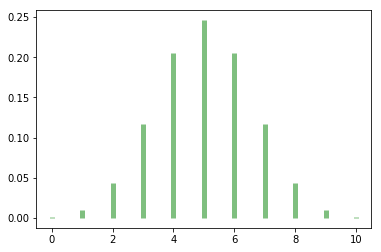

In [17]:
plt.vlines(x, 0, prob, colors='green', lw=5, alpha=0.5)

Судя по значению коэффициента эксцесса ($-0.2$), пик распределения недостаточно ярко выражен, что видно и на графике: переход между вероятностью самого вероятного значения $5$ и значений справа и слева от него не очень резкий. 

Кстати, значения моментов распределения можно сохранить все по отдельности и при этом одной строкой:

In [18]:
ex, dx, skew, kurt = binm.stats('mvsk')
print(skew, kurt)

0.0 -0.2


Теперь мы можем решить какую-нибудь задачу.

**Задача 1**

Известно, что $70$% студентов очной формы обучения совмещают обучение с работой. Для проведения интервью мы случайным образом выбираем $10$ студентов.

a. Какова вероятность того, что среди выбранных респондентов будет ровно $4$ работающих студента?

b. Какова вероятность того, что среди выбранных респондентов будет не менее $8$ работающих студентов?

Одно испытание Бернулли – опрос одного студента. Успех – студент совмещает работу и учебу, неудача – не совмещает. $p=0.7$ и $q=0.3$. Раз опрашиваем $10$ студентов, имеем серию из $n=10$ испытаний Бернулли. Сгенерируем величину $X$, которая имеет биномиальное распределение с параметрами $n=10$, $p=0.7$.

In [19]:
x = st.binom(n=10, p=0.7)

a. $P(X = 4)$

In [20]:
x.pmf(4)  # pmf - от probability mass function

0.03675690900000004

b. $P(X \geq 8) = P(X=8) + P(X=9) + P(X=10)$

In [21]:
x.pmf(8) + x.pmf(9) + x.pmf(10)

0.3827827863999999

**Задача 2**

Правильную монету подбросили $20$ раз. В каких пределах будет лежать число выпавших в этом эксперименте орлов с вероятностью $0.95$?

Сгенерируем случайную величину:

In [22]:
Y = st.binom(n=20, p=0.5)

Определим интервал, симметричный относительно математического ожидания, который накрывает $95%$ всех значений с помощью метода `.interval()`:

In [23]:
Y.interval(0.95)

(6.0, 14.0)

Можем посмотреть на все вероятности и убедиться в этом:

In [24]:
for k in range(0, 20):  # все целые числа от 0 до 10
    print(k, Y.pmf(k))

0 9.5367431640625e-07
1 1.907348632812499e-05
2 0.00018119812011718734
3 0.0010871887207031235
4 0.004620552062988271
5 0.014785766601562429
6 0.03696441650390614
7 0.07392883300781268
8 0.12013435363769531
9 0.16017913818359344
10 0.17619705200195293
11 0.16017913818359344
12 0.12013435363769531
13 0.07392883300781268
14 0.03696441650390614
15 0.014785766601562429
16 0.004620552062988271
17 0.0010871887207031235
18 0.00018119812011718734
19 1.907348632812499e-05
